# 1. Importar librerías y cargar los datos

In [8]:
from sklearn.datasets import load_boston
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pylab as plt

In [1]:
X, y = load_boston(return_X_y=True)

In [2]:
print(load_boston()['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
mod = KNeighborsRegressor()
mod.fit(X, y)
mod.predict(X)[:3]

array([21.78, 22.9 , 25.36])

In [5]:
from sklearn.linear_model import LinearRegression


In [6]:

mod = LinearRegression()
mod.fit(X, y)
mod.predict(X)[:3]

array([30.00384338, 25.02556238, 30.56759672])

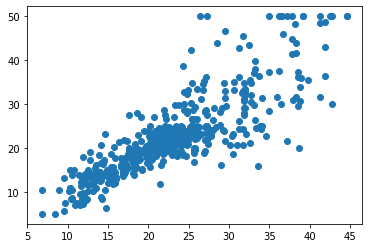

In [9]:
mod = KNeighborsRegressor().fit(X, y)
pred = mod.predict(X)
plt.scatter(pred, y)

# Preprocesamiento

### Estandarizar los datos `StandardScaler`

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

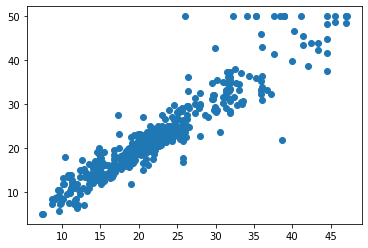

In [16]:
mod = KNeighborsRegressor().fit(X, y)

pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor())
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

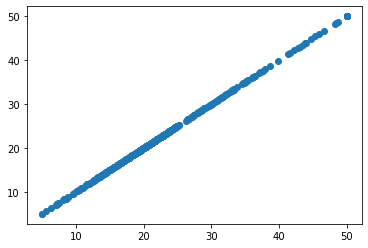

In [12]:
# If n_neighbors = 1, we're totally cheating with the chart below.
pipe = Pipeline([
    ("scale", StandardScaler()),
    ("model", KNeighborsRegressor(n_neighbors=1))
])
pred = pipe.fit(X, y).predict(X)
plt.scatter(pred, y)

### Usando `GridSearchCV`, tuneando los valores

In [13]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

In [25]:
mod = GridSearchCV(estimator=pipe,
                 param_grid={
                   'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
                 },
                 cv=3)
mod.fit(X, y);

In [26]:
pd.DataFrame(mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001737,0.000406,0.002470,0.000553,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001920,0.000428,0.002905,0.000789,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.004487,0.001569,0.004990,0.000600,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001870,0.000290,0.003987,0.000431,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001819,0.000664,0.002537,0.000537,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.001149,0.000106,0.001923,0.000108,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001139,0.000167,0.001810,0.000078,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001078,0.000066,0.002022,0.000203,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001049,0.000025,0.001828,0.000187,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.001078,0.000070,0.001977,0.000116,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4
